In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,auc,roc_auc_score
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import scipy

In [2]:
train_features=np.load('train_features.npy')
train_labels=np.load('train_labels.npy')
test_features=np.load('test_features.npy')
pca = PCA(n_components=63)
pca.fit(train_features)
train_feature= pca.transform(train_features)
test_feature= pca.transform(test_features)

In [3]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=2002)
X_resampled, y_resampled = smote.fit_resample(train_feature, train_labels)

[1.40517356 1.24508027 0.94765551 1.33570504 1.32556457 0.95396278
 1.25142561 1.25382298 1.42742339 1.09049951]
[1.33626614 1.15123296 0.97955104 1.34966263 1.34018728 1.24206628
 1.43738167 1.29389883 1.41527489 1.279311  ]
[1.34521195 1.29466672 1.23298008 1.34966263 1.36017461 1.24206628
 1.52062892 1.31233465 1.41262008 1.3417527 ]
[1.2771783  1.34074651 1.2384398  1.35021793 1.36017461 1.25766019
 1.52062892 1.34398895 1.41262008 1.2845817 ]
[1.2771783  1.34074651 1.24387555 1.37715349 1.36951167 1.38258607
 1.52062892 1.34398895 1.41315144 1.27754927]
[1.26597735 1.34074651 1.20468849 1.39069514 1.37005893 1.42530146
 1.59437826 1.32145611 1.41315144 1.27754927]
[1.28711758 1.34074651 1.20468849 1.26597735 1.36951167 1.42530146
 1.59437826 1.32031937 1.41315144 1.27754927]
[1.28711758 1.34576909 1.20468849 1.39768496 1.36951167 1.42582731
 1.59437826 1.42584467 1.41315144 1.27696148]
[1.28711758 1.34576909 1.2354096  1.41102959 1.36951167 1.42582731
 1.59437826 1.40889495 1.4131

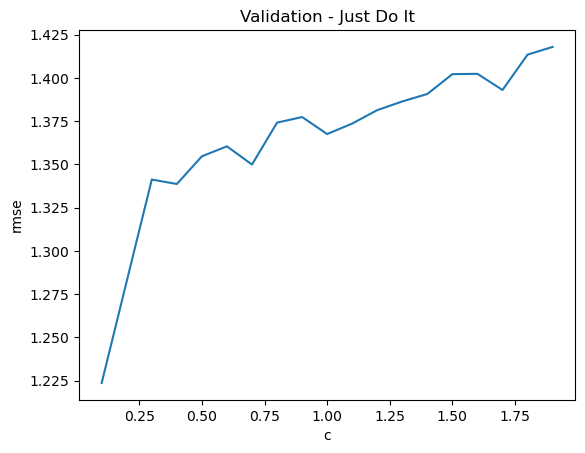

In [25]:
import pandas as pd
def rmse_cv(model):
     rmse= np.sqrt(-cross_val_score(model, train_feature, train_labels, scoring="neg_mean_squared_error", cv = 10))
     print(rmse)
     return(rmse)
C=np.arange(0.1,2,0.1)
cv_logistics = [rmse_cv(LogisticRegression(C=c,max_iter=30000)).mean() for c in C]

 
cv_logistics = pd.Series(cv_logistics, index = C)
cv_logistics.plot(title = "Validation - Just Do It")
plt.xlabel("c")
plt.ylabel("rmse")
plt.show()

In [10]:
accuracy_train=np.zeros((200,1))
accuracy_validation=np.zeros((200,1))
model_all=[]
for k in range(200):
    Var0 = X_resampled.var(axis = 0)
    var=np.zeros((7500,63))
    for i in range(63):
        a=np.random.normal(0,0.05*pow(Var0,0.5)[i],[7500,1])
        for j in range(7500):
            var[j][i]=a[j]
    X_resampled0=X_resampled+var
    train_data,test_data,train_label,test_label =train_test_split(X_resampled0,y_resampled,stratify=y_resampled, random_state=k, train_size=0.80,test_size=0.20) #sklearn.model_selection.
    lr_model = LogisticRegression(C=0.1, penalty='l2', solver='sag', multi_class='auto',max_iter=3000)
    lr_model.fit(train_data, train_label)
    model_all.append(lr_model)
    a=lr_model.score(train_data,train_label)
    accuracy_train[k]=a
    b=lr_model.score(test_data,test_label)
    accuracy_validation[k]=b
    print("训练集：",a)
    print("测试集：",b)
test_result=np.zeros((2857,200))
for k in range(200):
    test_result0=model_all[k].predict(test_feature)
    for i in range(2857):
        test_result[i][k]=test_result0[i]
test_results=scipy.stats.mode(test_result,1)
print(test_results)
np.savetxt('output.csv', test_results[0], delimiter=', ')

训练集： 0.989
测试集： 0.956
训练集： 0.9898333333333333
测试集： 0.964
训练集： 0.9876666666666667
测试集： 0.9666666666666667
训练集： 0.9865
测试集： 0.9646666666666667
训练集： 0.9891666666666666
测试集： 0.9586666666666667
训练集： 0.9878333333333333
测试集： 0.9626666666666667
训练集： 0.989
测试集： 0.9573333333333334
训练集： 0.9893333333333333
测试集： 0.9593333333333334
训练集： 0.9883333333333333
测试集： 0.9653333333333334
训练集： 0.988
测试集： 0.97
训练集： 0.9895
测试集： 0.9586666666666667
训练集： 0.9895
测试集： 0.956
训练集： 0.9888333333333333
测试集： 0.962
训练集： 0.9898333333333333
测试集： 0.9646666666666667
训练集： 0.9878333333333333
测试集： 0.954
训练集： 0.9878333333333333
测试集： 0.9606666666666667
训练集： 0.989
测试集： 0.96
训练集： 0.9883333333333333
测试集： 0.966
训练集： 0.9886666666666667
测试集： 0.9653333333333334
训练集： 0.9875
测试集： 0.9666666666666667
训练集： 0.9886666666666667
测试集： 0.964
训练集： 0.989
测试集： 0.9586666666666667
训练集： 0.988
测试集： 0.9646666666666667
训练集： 0.9885
测试集： 0.968
训练集： 0.9886666666666667
测试集： 0.9646666666666667
训练集： 0.9886666666666667
测试集： 0.9573333333333334
训练集： 0.988
测试集： 0.9613

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_55504\3034260876.py:27: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  test_results=scipy.stats.mode(test_result,1)


In [11]:
accuracy_train_average=accuracy_train.mean()
print(accuracy_train_average)
accuracy_validation_average=accuracy_validation.mean()
print(accuracy_validation_average)

0.9887608333333333
0.96076


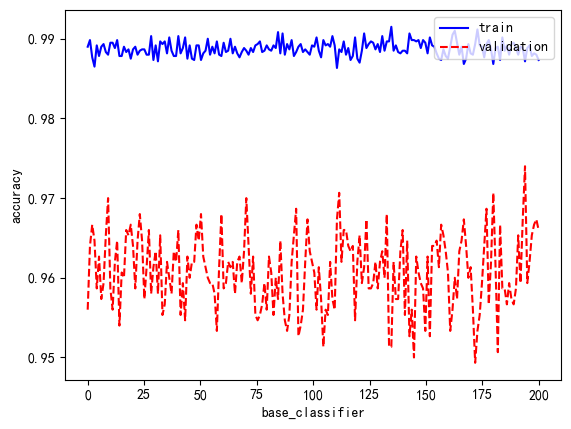

In [14]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
x_axis_data = np.linspace(0, 200,200 )
plt.plot(x_axis_data,accuracy_train,linestyle="-",color="b")
plt.plot(x_axis_data,accuracy_validation,linestyle="--",color="r")
plt.legend(["train","validation"],loc="upper right")
plt.xlabel('base_classifier')
plt.ylabel('accuracy')
plt.show()